In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import galpy.potential
import thesis_rcparams

# show the vector field of the gravitational potential 

In [2]:
def GetForceGrid(galpyPotential,Rlim,Zmin,npointsQuiver):
    # make a list of positions 
    RsFlat=np.linspace(Rlim[0],Rlim[1],npointsQuiver)
    ZsFlat=np.linspace(Zmin[0],Zmin[1],npointsQuiver)
    RsFlat,ZsFlat = np.meshgrid(RsFlat,ZsFlat)
    RsFlat=RsFlat.flatten()
    ZsFlat=ZsFlat.flatten()
    # get the force at those positions
    Rforce = galpyPotential.Rforce(RsFlat,ZsFlat)
    zForce = galpyPotential.zforce(RsFlat,ZsFlat)
    Force = np.zeros((2,len(RsFlat)))
    Force[0,:] = Rforce
    Force[1,:] = zForce
    return RsFlat,ZsFlat,Force

In [95]:
a=4
b=1/20
disc=galpy.potential.MiyamotoNagaiPotential(amp=1,a=a,b=b)

In [77]:
npoints = 300
R = np.linspace(-10,10,npoints)
z = np.linspace(-10,10,npoints)
Rs,Zs = np.meshgrid(R,z)
DiscDensity = disc.dens(Rs,Zs)
phi=galpy.potential.evaluatePotentials(disc,Rs,Zs)

In [78]:
# get the forces
npointsQuiver = 10 
Rlim = (-10,10)
Zmin = (-10,10)
RFvec,ZFvec,Force = GetForceGrid(disc,Rlim,Zmin,npointsQuiver)
forceMag=np.linalg.norm(Force,axis=0)
forceNorm=Force/forceMag
# make  the force colors 
normForce=mpl.colors.LogNorm(vmin=np.min(forceMag), vmax=np.max(forceMag))
cmapForce=mpl.colormaps['grey_r']
colorsForce=cmapForce(normForce(forceMag))  

In [79]:
# make forces in the x-y plane 
xs=np.linspace(-10,10,300)
ys=np.linspace(-10,10,300)
X,Y=np.meshgrid(xs,ys)
R = np.sqrt(X**2+Y**2)
potential_z0=galpy.potential.evaluatePotentials(disc,R,0)
# now get the vector in the plane 
Rforce = disc.Rforce(R,0)
xs_quiv = np.linspace(-10,10,npointsQuiver)
ys_quiv = np.linspace(-10,10,npointsQuiver)
Xs_quiv,Ys_quiv = np.meshgrid(xs_quiv,ys_quiv)
Rpos_quiv = np.sqrt(Xs_quiv**2+Ys_quiv**2)
Rforce_quiv = disc.Rforce(Rpos_quiv,0)
# this is the magnitude at each position 
# make a vector field that points inward at each xy
Xs_quiv = Xs_quiv.flatten()
Ys_quiv = Ys_quiv.flatten()
Rforce_quiv = Rforce_quiv.flatten()
Rdist_quiv = np.sqrt(Xs_quiv**2+Ys_quiv**2)
xForceNorm = -Xs_quiv/Rdist_quiv
yForceNorm = -Ys_quiv/Rdist_quiv
# make the colors
colorsForceXY=cmapForce(normForce(np.abs(Rforce_quiv)))

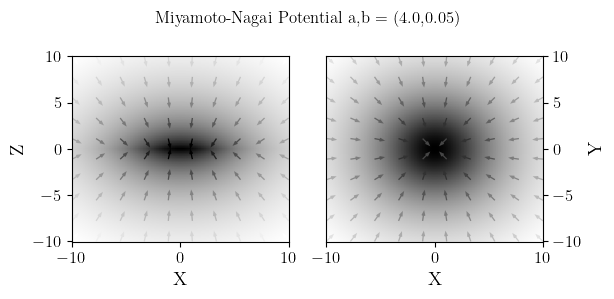

In [101]:
fig,axis = plt.subplots(1,2,figsize=(8.25-2,3))
axis[0].pcolormesh(Rs,Zs,phi,cmap='grey',shading='auto')
axis[0].quiver(RFvec,ZFvec,forceNorm[0],forceNorm[1],color=colorsForce,headlength=4,scale=20)
axis[1].pcolormesh(X,Y,potential_z0,cmap='grey',shading='auto')
axis[1].quiver(Xs_quiv,Ys_quiv,xForceNorm,yForceNorm,color=colorsForceXY,headlength=4,scale=20)
axis[0].set_xlabel('X ')
axis[0].set_ylabel('Z ')
axis[1].set_xlabel('X ')
axis[1].set_ylabel('Y ')
axis[1].yaxis.set_label_position("right")
axis[1].yaxis.tick_right()
fig.suptitle('Miyamoto-Nagai Potential a,b = ({:.1f},{:.2f})'.format(a,b))
fig.tight_layout()

## Look at the potential that we used in tstrippy

In [119]:
def setupfigre():
    fig=plt.figure(figsize=(8.25-2,11.5-2))
    gs = fig.add_gridspec(4, 2)
    axes=[]
    axes.append(fig.add_subplot(gs[0, 0]))
    axes.append(fig.add_subplot(gs[0, 1]))
    axes.append(fig.add_subplot(gs[1, 0]))
    axes.append(fig.add_subplot(gs[1, 1]))
    axes.append(fig.add_subplot(gs[2, 0]))
    axes.append(fig.add_subplot(gs[2, 1]))
    axes.append(fig.add_subplot(gs[3, 0]))
    axes.append(fig.add_subplot(gs[3, 1]))
    return fig,axes

In [140]:
NFW = galpy.potential.NFWPotential(amp=0.6,a=4)
disc1=galpy.potential.MiyamotoNagaiPotential(amp=0.4,a=1,b=0.2)
disc2=galpy.potential.MiyamotoNagaiPotential(amp=0.4,a=1,b=0.2)
mygalaxy = NFW+disc1+disc2

In [168]:
# make a grid of points 
npoints = 300
Rs = np.linspace(0.1,10,npoints)
Zs = np.linspace(-10,10,npoints)
Rss,Zss = np.meshgrid(Rs,Zs)

In [169]:
total_potential=galpy.potential.evaluatePotentials(mygalaxy,Rss,Zss)
norm=mpl.colors.Normalize(vmin=np.min(total_potential), vmax=np.max(total_potential)/10)

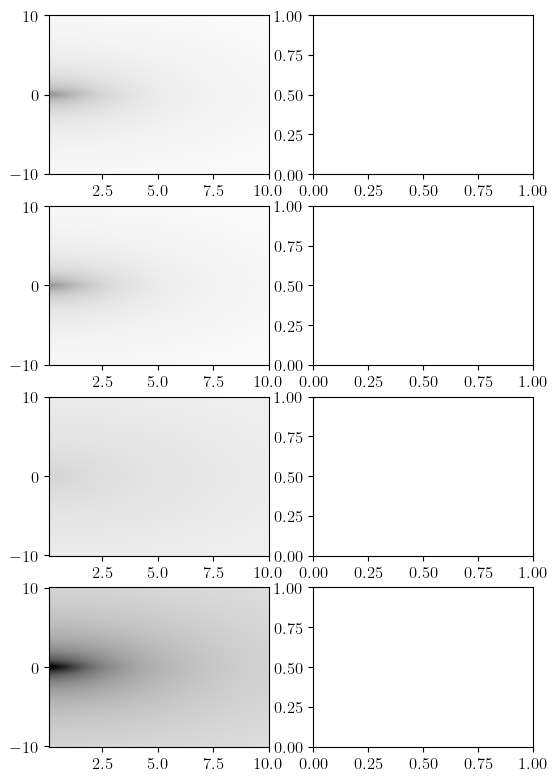

In [170]:
fig,axes=setupfigre()
axes[0].pcolormesh(Rss,Zss,galpy.potential.evaluatePotentials(disc1,Rss,Zss),cmap='grey',shading='auto',norm=norm)
axes[2].pcolormesh(Rss,Zss,galpy.potential.evaluatePotentials(disc2,Rss,Zss),cmap='grey',shading='auto',norm=norm)
axes[4].pcolormesh(Rss,Zss,galpy.potential.evaluatePotentials(NFW,Rss,Zss),cmap='grey',shading='auto',norm=norm)
axes[6].pcolormesh(Rss,Zss,total_potential,cmap='grey',shading='auto',norm=norm)


array([[ 0.00621771,  0.00622985,  0.00624171, ..., -0.00624171,
        -0.00622985, -0.00621771],
       [ 0.00627405,  0.00628666,  0.00629899, ..., -0.00629899,
        -0.00628666, -0.00627405],
       [ 0.00633091,  0.006344  ,  0.00635681, ..., -0.00635681,
        -0.006344  , -0.00633091],
       ...,
       [ 0.00633091,  0.006344  ,  0.00635681, ..., -0.00635681,
        -0.006344  , -0.00633091],
       [ 0.00627405,  0.00628666,  0.00629899, ..., -0.00629899,
        -0.00628666, -0.00627405],
       [ 0.00621771,  0.00622985,  0.00624171, ..., -0.00624171,
        -0.00622985, -0.00621771]], shape=(300, 300))